<a href="https://colab.research.google.com/github/SMatusik/house_pricing/blob/main/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import niezbednych bibliotek w jezyku Python
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ustawienie ladniejszego wygladu wykresow
sns.set()

In [ ]:
# pobranie zbioru, mozna z pliku lokalnego ('local') lub prosto z sieci ('web')
web = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx'
local = 'Real estate valuation data set.xlsx'
dataset = pd.read_excel(local)
#dataset = pd.read_excel(web)
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# warto sprawdzic czy plik z danymi zawiera wszystkie dane, czy nie ma brakow
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Zbiór zawiera informacje o 414 domach. 
Zmienne objaśniające:


1.   X1 transaction date - data dokonania transakcji.
2.   X2 house age - wiek domu w latach.
3.  X3 distance to the nearest MRT - odległość domu od najbliższej stacji metra w metrach.
4. X4 number of convenience stores - liczba spożywczych sklepów w zasięgu spaceru.
5. X5 latitude - współrzędne szerokości geograficznej położenia domu w stopniach.
6. X6 longitude - współrzędne wysokości geograficznej położenia domu w stopniach.

Zmienna objaśniana:
7. Y house price of unit area - cena za jednostkę powierzchni domu (10000 tajwańskich dolarów/ping, gdzie ping ~3.3m^2.



In [ ]:
# wyrzucenie nic nie znaczącej dla modelu zmiennej porządkowej 'No'
dataset = dataset.iloc[: , 1:8]

In [ ]:
# wyświetlenie podstawowych informacji statystycznych
dataset.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
# wyrzucenie spacji z nazw kolumn co ulatwi dostep do nich oraz wyrzucenie z nazw oznaczen "X+numer"
dataset.columns = [c.replace(' ', '_') for c in dataset.columns.str[3:]]


In [ ]:
# zmiana nazw kolumn na prostsze
dataset.rename(columns={dataset.columns[6]: "price" }, inplace = True)
dataset.rename(columns={dataset.columns[3]: "no_of_stores" }, inplace = True)
dataset.rename(columns={dataset.columns[2]: "metro_distance" }, inplace = True)

In [ ]:
# podzial danych na dane zmienna X (dane sluzace do nauki) oraz Y (wyniki)
X = dataset.iloc[: , 0:6]
X['no_of_stores'] = X['no_of_stores'].astype(float)

Y = dataset.iloc[:, 6]

In [ ]:
# wyswietlenie pierwszych 5 wierszy zeby sprawdzic podzial danych
X.head()

,transaction_date,house_age,metro_distance,no_of_stores,latitude,longitude
0,2012.916667,32.0,84.87882,10.0,24.98298,121.54024
1,2012.916667,19.5,306.59470,9.0,24.98034,121.53951
2,2013.583333,13.3,561.98450,5.0,24.98746,121.54391
3,2013.500000,13.3,561.98450,5.0,24.98746,121.54391
4,2012.833333,5.0,390.56840,5.0,24.97937,121.54245


In [ ]:
# sprawdzenie czy dane poprawnie sie rozdzielily
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64

In [ ]:
# dzieki sci-kit-learn mozna prosto podzielic dane w losowy sposob na dane treningowe (90%) oraz testowe (10%) za pomoca parametru train_size
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9)

In [ ]:
# zaimportowanie klasy regresji liniowej
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# metoda ktora uczy model korzystajac z rozdzielonych danych treningowych
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# uzycie wyuczonego modelu do prognozowania danych testowych
Y_pred = model.predict(X_test)

In [ ]:
# obliczenia R2-score oraz błędu średniokwadratowego 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R2 Score danych testowych ' +  str(r2_score(Y_test, Y_pred)))
print('Błąd średniokwadratowy dla danych testowych: ' + str(mean_squared_error(Y_test, Y_pred)))

R2 Score danych testowych 0.379319745127607
Błąd średniokwadratowy dla danych testowych: 222.39068182298112


In [ ]:
# utworzenie tabeli z wynikami, etykietą oraz bledem predykcji
results = pd.DataFrame(data={'Y_test': Y_test, 'Y_pred': Y_pred})
results['Error'] = results['Y_test'] - results['Y_pred']


In [ ]:
# podejrzenie etykiet, wynikow i bledow
results.head(25).T

,379,369,123,44,60,387,135,350,125,155,339,348,233,151,343,187,244,119,141,270,390,179,232,372,7
Y_test,69.700000,22.800000,45.500000,53.900000,21.300000,25.600000,20.80000,42.300000,48.600000,15.600000,50.400000,53.700000,32.400000,44.700000,46.600000,22.000000,21.700000,59.600000,28.90000,117.50000,38.600000,42.600000,17.400000,41.500000,46.700000
Y_pred,50.664524,28.172536,42.595161,46.909878,33.522292,31.254692,30.66446,40.912199,47.290579,15.710614,50.067631,47.177774,44.330498,54.188758,42.980945,23.533463,38.471734,46.860003,39.40827,41.19357,44.612643,38.680341,13.177762,39.476031,46.382308
Error,19.035476,-5.372536,2.904839,6.990122,-12.222292,-5.654692,-9.86446,1.387801,1.309421,-0.110614,0.332369,6.522226,-11.930498,-9.488758,3.619055,-1.533463,-16.771734,12.739997,-10.50827,76.30643,-6.012643,3.919659,4.222238,2.023969,0.317692


In [ ]:
# obliczone wartosci modelu
print('wyraz wolny w równaniu regresji liniowej' + str(model.intercept_))
print('wspolczynniki dotyczace zmiennych:' + str(model.coef_))

wyraz wolny w równaniu regresji liniowej-14458.226757904295
wspolczynniki dotyczace zmiennych:[ 4.06185317e+00 -2.63090071e-01 -3.88516046e-03  1.21329100e+00
  2.37136251e+02  3.30602179e+00]


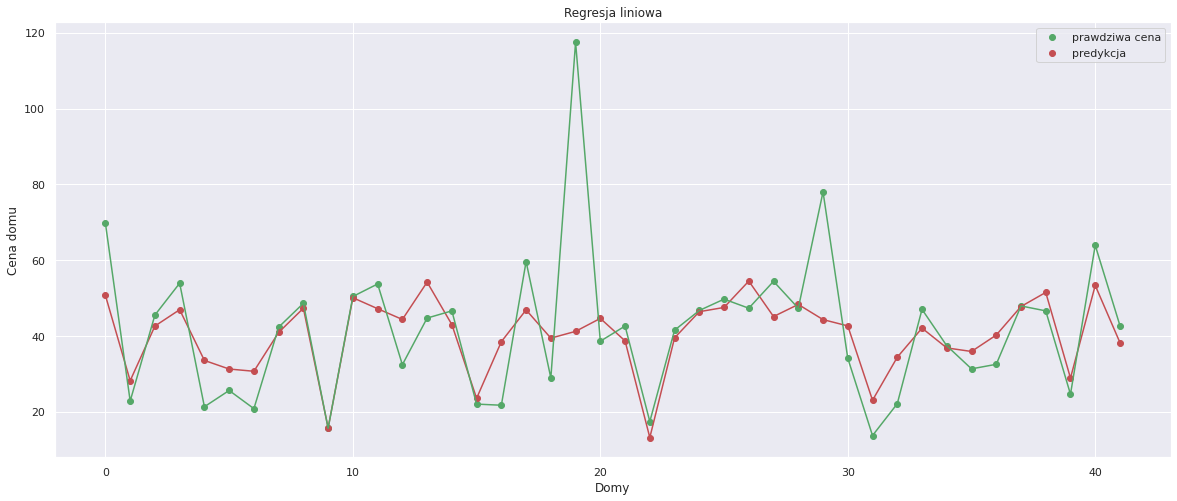

In [ ]:
# wyswietlenie wykresu wyników predykcji, danych rzeczywistych i obliczonego błędu
import matplotlib.pyplot as plt


plt.figure(figsize=(20,8))

plt.scatter(y=Y_test, x=np.arange(0, Y_test.shape[0], 1), c='g', label='prawdziwa cena')
plt.scatter(y=Y_pred, x=np.arange(0, Y_pred.shape[0], 1), c='r', label='predykcja')
plt.plot(Y_pred, c='r')
plt.plot(Y_test.reset_index(drop=True), c='g')


plt.xlabel('Domy')
plt.ylabel('Cena domu')
plt.title('Regresja liniowa')

plt.legend()
plt.show()

Text(0.5, 1.0, 'Błąd predykcji regresji liniowej')

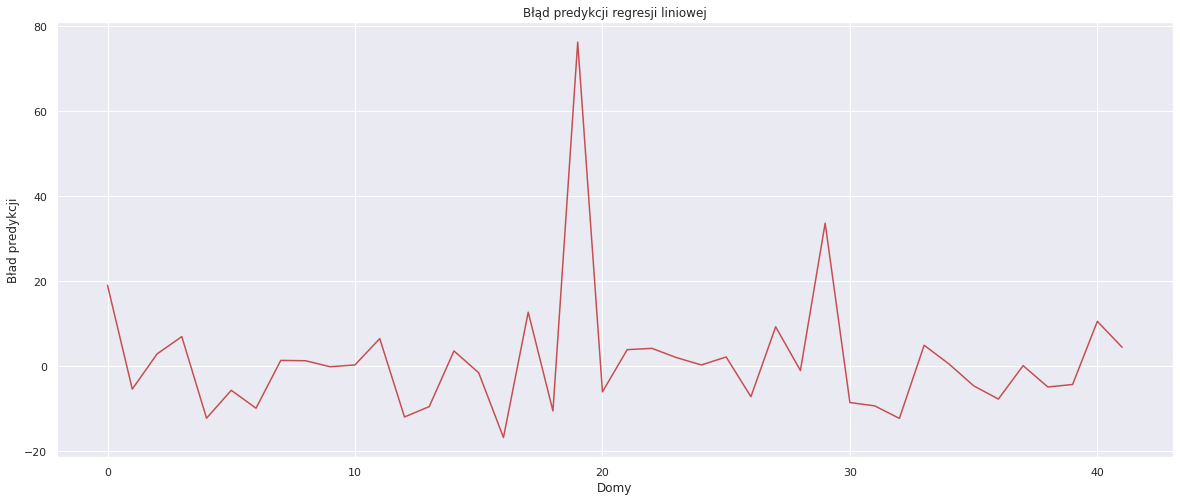

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(np.arange(0, results['Error'].shape[0], 1), results['Error'], c='r', label='błąd')
plt.xlabel('Domy')
plt.ylabel('Bład predykcji')
plt.title('Błąd predykcji regresji liniowej')

Text(0.5, 0, 'Koszt jednostki powierzchni domu')

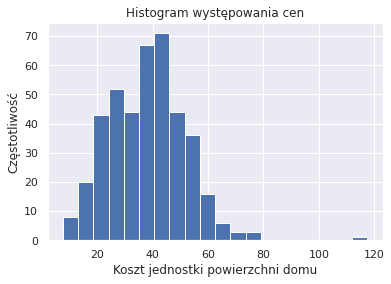

In [ ]:
# histogram wystepowania cen
chart = dataset['price'].plot(kind='hist', title='Histogram występowania cen', bins=20)
chart.set_ylabel("Częstotliwość")
chart.set_xlabel("Koszt jednostki powierzchni domu")


In [ ]:
# obliczenie korelacji kolumny 'price' z innymi kolumnami
dataset.corr()['price'].sort_values(ascending=False)

price               1.000000
no_of_stores        0.571005
latitude            0.546307
longitude           0.523287
transaction_date    0.087529
house_age          -0.210567
metro_distance     -0.673613
Name: price, dtype: float64

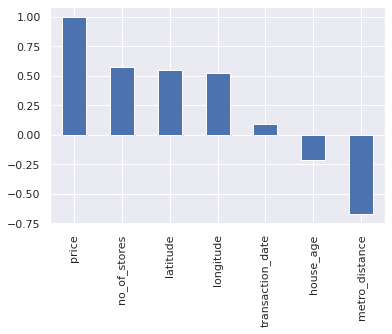

In [ ]:
dataset.corr()['price'].sort_values(ascending=False).plot(kind='bar')

# korelacja zmiennej ceny domu z innymi. Widać, że głównie wpływ na cenę domu ma liczba sklepów w okolicy i jego położenie

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Liczba sklepów w okolicy')

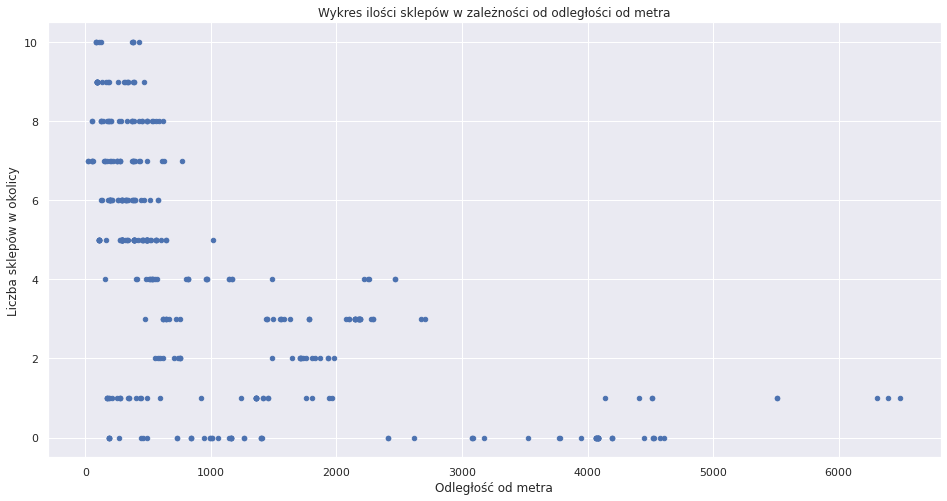

In [ ]:
chart = dataset.plot.scatter(figsize=(16, 8), x='metro_distance', y='no_of_stores', title = 'Wykres ilości sklepów w zależności od odległości od metra')
chart.set_xlabel("Odległość od metra")
chart.set_ylabel("Liczba sklepów w okolicy")

# jak widac w okolicach metra jest o wiele więcej sklepów

In [ ]:
# mapa z lokalizacja omawianych domow
# zaimportowanie biblioteki plotly express, ktora dosyc latwo wyrysuje wspolrzedne na mapie
import plotly.express as px

chart = px.scatter_mapbox(dataset, lat='latitude', lon='longitude', color='price', size='house_age', zoom=12)
chart.update_layout(mapbox_style='carto-positron', margin={'l': 10, 'r': 10, 't':10, 'b':10})
chart.show()